In [1]:
import numpy as np
import matplotlib.pyplot as plt
from single_layer_delta_rule import Single_Layer_Delta_Rule
from single_layer_perceptron import Single_Layer_Perceptron

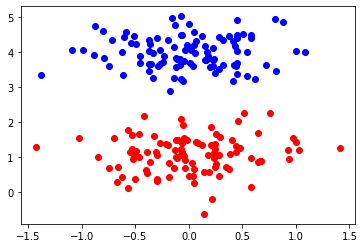

In [2]:
n = 100
mA = np.array([0, 4])
mB = np.array([0, 1])
sigmaA = 0.5
sigmaB = 0.5
classA = np.zeros([n,2])
classB = np.zeros([n,2])
classA[:,0] = np.random.normal(mA[0], sigmaA, n)
classA[:,1] = np.random.normal(mA[1], sigmaA, n)
classB[:,0] = np.random.normal(mB[0], sigmaB, n)
classB[:,1] = np.random.normal(mB[1], sigmaB, n)

plt.plot(classA[:,0], classA[:,1], 'bo', color = 'b')
plt.plot(classB[:,0], classB[:,1], 'bo', color = 'r')

In [16]:
data = np.concatenate((classA, classB), axis=0)
labels = np.array([1]*n + [0]*n)

data_labels = np.concatenate((data, labels.reshape(n*2,1)), axis=1)
#np.random.shuffle(data_labels)

X = data_labels[:,:2].T
T_percept = data_labels[:,2].reshape(n*2, 1).T
T_delta = np.copy(T_percept)
for i, t in enumerate(T_percept[0,:]):
    if t == 0:
        T_delta[0,i] = -1

In [4]:
perceptron = Single_Layer_Perceptron(X, T_percept)

Obtained error 0.0


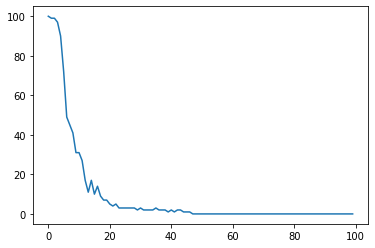

In [5]:
perceptron.epochs = 100
perceptron.train('batch')
perceptron.plot_errors()

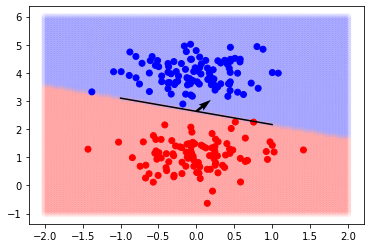

In [6]:
perceptron.plot_decision_boundary()

In [44]:
delta = Single_Layer_Delta_Rule(X, T_delta)

Obtained error 10.096437302985091
Obtained error 10.122910365514768


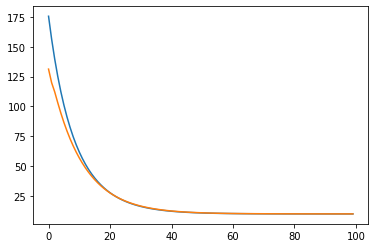

In [45]:
delta.epochs = 100

delta.train('batch')
delta.plot_errors()

delta.errors = []
delta.W_train = delta.W_init
delta.train('seq')
delta.plot_errors()

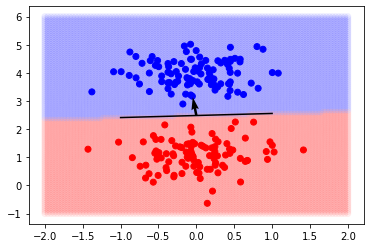

In [11]:
delta.plot_decision_boundary()

In [46]:
delta.X.shape

(3, 200)

In [47]:
delta.W_train.shape

(1, 3)

In [50]:
np.matmul(delta.W_train, delta.X).shape

(1, 200)

In [56]:
H = np.matmul(delta.W_train, delta.X)[0]

In [70]:
x = delta.X[:,i].reshape(delta.X.shape[0], 1)
h_vec = np.matmul(delta.W_train, x)[0]

In [72]:
h_vec[0]

IndexError: index 1 is out of bounds for axis 0 with size 1

In [74]:
h_vec = np.matmul(delta.W_train, x)[0]
np.matmul(h_vec, delta.W_train)

array([ 0.03483821, -0.4840204 ,  1.25276863])

In [78]:
delta.T.shape

(1, 200)